In [5]:
#copy this to separate place

In [6]:
#Make a graph out of equivalence classes. Edge distance is Jaccard

In [2]:
class EquivCollection(object):
    def __init__(self):
        self.tnames = []
        self.eqClasses = {}
        self.hasNames = False

    def setNames(self, names):
        self.tnames = names
        self.hasNames = True

    def add(self, tids, count):
        if tids in self.eqClasses:
            self.eqClasses[tids] += count
        else:
            self.eqClasses[tids] = count

def readEqClass(eqfile, eqCollection):
    with open(eqfile) as ifile:
        numTran = int(ifile.readline().rstrip())
        numEq = int(ifile.readline().rstrip())
        print("file: {}; # tran = {}; # eq = {}".format(eqfile, numTran, numEq))
        if not eqCollection.hasNames:
            tnames = []
            for i in xrange(numTran):
                tnames.append(ifile.readline().rstrip())
            eqCollection.setNames(tnames)
        else:
            for i in xrange(numTran):
                ifile.readline()

        for i in xrange(numEq):
            toks = map(int, ifile.readline().rstrip().split('\t'))
            nt = toks[0]
            tids = tuple(toks[1:-1])
            count = toks[-1]
            eqCollection.add(tids, count)
            
def getCountsFromEquiv(eqCollection):
    countDict = {}
    tn = eqCollection.tnames
    for tids, count in eqCollection.eqClasses.iteritems():
        for t in tids:
            if tn[t] in countDict:
                countDict[tn[t]] += count
            else:
                countDict[tn[t]] = count
    # ensure no division by 0
    for t in eqCollection.tnames:
        if t in countDict:
            countDict[t] += 1.0
        else:
            countDict[t] = 1.0
    return countDict

def buildEqGraph(eqPath):
    tn = eqiv.tnames

In [22]:
def revcomp(s):
    comp = {'A':'T','T':'A','G':'C','C':'G','a':'t','t':'a','g':'c','c':'g','N':'N'}
    r = ''.join(comp[e] for e in s[::-1])
    return r

In [3]:
eqPath = "/home/hirak/Projects/quark/quickQuark/data/res/aux/eq_classes.txt"
equiv = EquivCollection()
readEqClass(eqPath, equiv)
groups = equiv.eqClasses.keys()

file: /home/hirak/Projects/quark/quickQuark/data/res/aux/eq_classes.txt; # tran = 95309; # eq = 186611


In [11]:
equiv.tnames[61539]

'ENST00000442160.3|ENSG00000119725.13|OTTHUMG00000171257.3|OTTHUMT00000412595.1|ZNF410-012|ZNF410|2076|UTR5:1-194|CDS:195-1745|UTR3:1746-2076|'

In [17]:
import linecache
txpPath = "/home/hirak/Projects/quark/quickQuark/data/gencode_transcript/gencode.v19.pc_transcripts.fa"
seq = linecache.getline(txpPath,61540*2).rstrip()

In [33]:
"TCTGGCCCTAATTATGCTCTTCTATACCCACATACAGATCTTTTTTTTTTTTTT"

'TCTGGCCCTAATTATGCTCTTCTATACCCACATACAGATCTTTTTTTTTTTTTT'

In [37]:
seq[1628:1628+54]

'GTAAATCCACAAGAGAGTCTCGCTCCGTTGCCCAGGCTGGAGTGCAGTGGTGCG'

In [54]:
eqPath = "/mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt"
equiv = EquivCollection()
readEqClass(eqPath, equiv)
groups = equiv.eqClasses.keys()

file: /mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt; # tran = 86331; # eq = 75568


In [66]:
from collections import defaultdict
classDict = {}
tr2eq = defaultdict(list)
for gkey,tids in enumerate(equiv.eqClasses.keys()):
    classDict[gkey] = tids
    for t in tids:
        tr2eq[t].append(gkey)

In [84]:
set(classDict[0]).union(set(classDict[1]))

{24488, 24489, 24490, 36224, 36225, 36227, 36229, 36230, 36231}

In [107]:
import itertools

oMetaFile = open("/mnt/scratch1/hirak/RapCompressData/metagraph.info",'w')
tn = equiv.tnames
oMetaFile.write("{}\n".format(len(tn)))
for tname in tn:
    oMetaFile.write("{}\n".format(tname))
for g in groups:
    oMetaFile.write("{}\n".format(g))

In [106]:
liX = xrange(len(groups))
oGraphFile = open("/mnt/scratch1/hirak/RapCompressData/graph.net",'w')
for i in liX:
    for j in xrange(i+1,len(liX)):
        g1 = groups[i]
        g2 = groups[j]
        eW = float(len(set(g1).intersection(set(g2))))/float(len(set(g1).union(set(g2))))
        if eW > 0.0:
            oGraphFile.write("{}\t{}\t{}\n".format(i,j,eW))

KeyboardInterrupt: 

In [ ]:
liX = xrange(len(groups))
oGraphFile = open("/mnt/scratch1/hirak/RapCompressData/graph.net",'w')
for i,j in itertools.combinations(a,2):
    g1 = groups[i]
    g2 = groups[j]
    eW = float(len(set(g1).intersection(set(g2))))/float(len(set(g1).union(set(g2))))
    if eW > 0.0:
        oGraphFile.write("{}\t{}\t{}\n".format(i,j,eW))

In [14]:
import itertools
def test1(comb,a):
    #a = [0,1,2,3,4,6]
    for i,j in itertools.combinations(a,2):
        #print i,j
        comb.append((i,j))
    #return comb
def test2(comb1,comb2,a):
    c = 0
    for i in a:
        for j in xrange(i+1,len(a)):
            comb1[c] = i
            comb2[c] = j
            c += 1
            #comb.append((i,j))
    #return comb

In [3]:

liX = xrange(len(groups))

In [ ]:
comb1 = []
test2(comb1,xrange(70000))

In [65]:
test2(comb2,liX)

In [19]:
import numpy as np
lX = len(liX)
sZ = ((lX)*(lX-1))/2
comb2i = np.zeros(sZ)
comb2j = np.zeros(sZ)
comb1 = []
#comb2 = []
#test1(comb1,xrange(5))
test2(comb2i,comb2j,xrange(70000))

In [7]:
len(liX)

75568

In [27]:
float(len(set(g1).intersection(set(g2))))/float(len(set(g1).union(set(g2))))

0.0

In [109]:
g1,g2,g3 = groups[:3]

In [110]:
g1,g2,g3

((24488, 24489, 24490),
 (36224, 36225, 36227, 36229, 36230, 36231),
 (5767, 84558))

In [111]:
from functools import partial
import numpy as np
import cPickle as pickle

from joblib import Parallel, delayed
import more_itertools
import random
from scipy.spatial.distance import cosine
from collections import defaultdict
from scipy.spatial.distance import cosine
import pandas as pd
import os
import cPickle as pickle

import psutil
from multiprocessing import cpu_count
import itertools

p = psutil.Process(os.getpid())
p.set_cpu_affinity(list(range(cpu_count())))


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [ ]:
def parallelize_func(iterable, func, chunksz=1, n_jobs=16, *args, **kwargs):
    """ Parallelize a function over each element of an iterable. """
    chunker = func
    chunks = more_itertools.chunked(iterable, chunksz)
    chunks_results = Parallel(n_jobs=n_jobs, verbose=50)(
        delayed(chunker)(chunk, *args, **kwargs) for chunk in chunks)
    results = more_itertools.flatten(chunks_results)
    return list(results)

In [25]:
import more_itertools as mi

In [50]:
comb1 = itertools.combinations(xrange(70000),2)

In [51]:
chunks = mi.chunked(comb1,1000)

In [47]:
count

2449965

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
df = pd.read_table("/mnt/scratch1/hirak/RapCompressData/gv1.net",sep="\t",header=None)

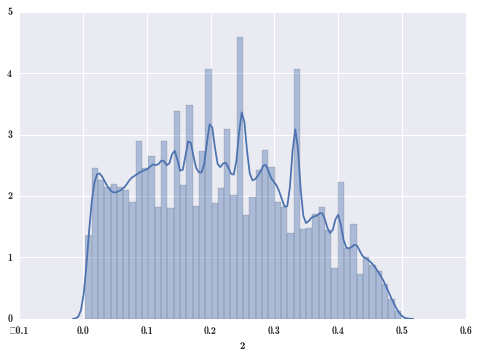

In [79]:
sns.distplot(df[2])

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


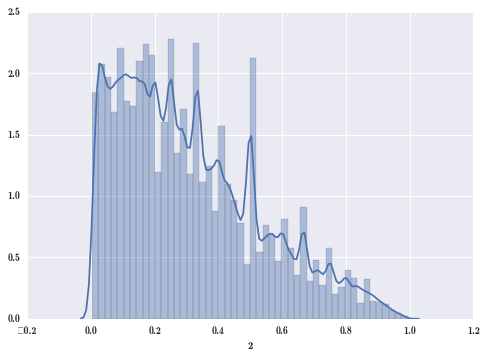

In [4]:
df = pd.read_table("/mnt/scratch1/hirak/RapCompressData/gv2.net",sep="\t",header=None)
sns.distplot(df[2])

In [5]:
df

,0,1,2
0,32917,7566,0.420000
1,24134,55626,0.148387
2,38900,29177,0.685714
3,70367,5234,0.036458
4,63049,56290,0.111111
5,1535,46448,0.352941
6,46970,56790,0.200000
7,54036,73537,0.206897
8,19124,42474,0.428571
9,57882,36875,0.500000


In [93]:
' S100A4__0'.strip()

'S100A4__0'

In [94]:
import networkx as nx

In [96]:
%timeit G = nx.read_edgelist('/mnt/scratch1/hirak/RapCompressData/gv2.net', nodetype=int, data=(('weight',float),))

1 loops, best of 3: 40 s per loop


In [98]:
import numpy

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections


eqPath = "/mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt"
equiv = EquivCollection()
readEqClass(eqPath, equiv)
groups = equiv.eqClasses.keys()
# Dimension of our vector space
dimension = len(equiv.tnames)

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)

# Create engine with pipeline configuration
engine = Engine(dimension, lshashes=[rbp])

# Index 1000000 random vectors (set their data to a unique string)
for index in range(100000):
    v = numpy.random.randn(dimension)
    engine.store_vector(v, 'data_%d' % index)

# Create random query vector
query = numpy.random.randn(dimension)

# Get nearest neighbours
N = engine.neighbours(query)

In [123]:
import numpy, scipy.sparse
sz = len(equiv.tnames)
n = 10
x = (numpy.zeros(sz)).astype(bool)